In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df=df.set_index(['Month'])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


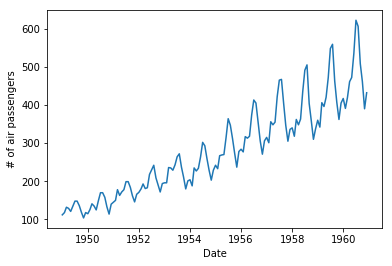

In [8]:
plt.xlabel('Date')
plt.ylabel('# of air passengers')
plt.plot(df)

In [9]:
def plot_graph(df):
    rolmean=df.rolling(window=12).mean()
    rolstd=df.rolling(window=12).std()
    
    orig=plt.plot(df,label='Original')
    mean=plt.plot(rolmean,label='Rolling mean')
    std=plt.plot(rolstd,label='Rolling std')
    plt.legend(loc='best')
    plt.show()

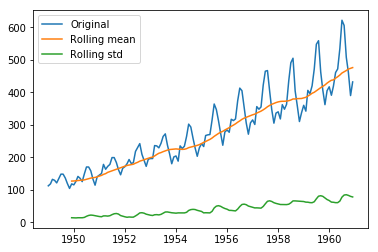

In [10]:
plot_graph(df)

In [11]:
def adcf_test(df):
    from statsmodels.tsa.stattools import adfuller
    
    dftest=adfuller(df)
    print('Test statistics ',dftest[0],
          '\nP-value         ',dftest[1],
          '\nThe number of lags used       ',dftest[2],
          '\nnumber of observations used   ',dftest[3])

In [12]:
adcf_test(df)#p-value 0.05 means the data is stationary

Test statistics  0.8153688792060518 
P-value          0.991880243437641 
The number of lags used        13 
number of observations used    130


In [13]:
#Time series transformation
air_passenger_data_log_scaled=np.log(df)
adcf_test(air_passenger_data_log_scaled)

Test statistics  -1.717017089106963 
P-value          0.4223667747703902 
The number of lags used        13 
number of observations used    130


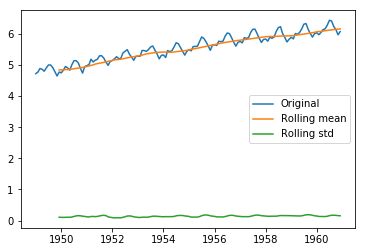

In [14]:
plot_graph(air_passenger_data_log_scaled)

In [15]:
ma=air_passenger_data_log_scaled.rolling(window=3).mean()
air_passenger_data_log_scaled_minus_ma=air_passenger_data_log_scaled-ma
air_passenger_data_log_scaled_minus_ma.dropna(inplace=True)
adcf_test(air_passenger_data_log_scaled_minus_ma)

Test statistics  -3.0400343941104864 
P-value          0.031321088260685775 
The number of lags used        11 
number of observations used    130


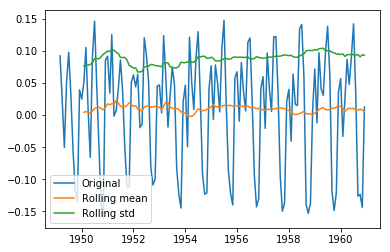

In [16]:
plot_graph(air_passenger_data_log_scaled_minus_ma)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

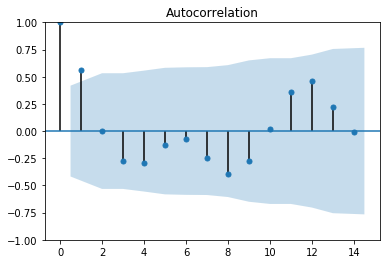

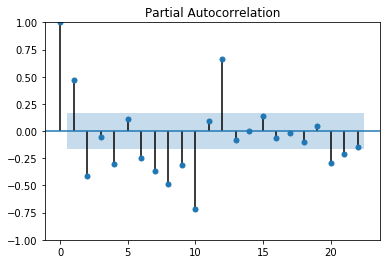

In [18]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

lag_acf=acf(air_passenger_data_log_scaled_minus_ma)
lag_pacf=pacf(air_passenger_data_log_scaled_minus_ma, method='ols')

plot_acf(lag_acf)
pacf_plot=plot_pacf(air_passenger_data_log_scaled_minus_ma['#Passengers'],method='ols')

In [19]:
#if the acf and pacf graph converging to 0
#in both case it is converging to 0
#acf Q=2 pacf p=3